# Hypothesis Testing - Part II

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

### Two Sample T-test

In [ ]:
#Load the data - we are going to use titanic dataset

df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We want to test if the average ticket price is the same for males and females

In [ ]:
df_female = df[df["Sex"]=="female"]["Fare"]
df_male = df[df["Sex"]=="male"]["Fare"]

In [ ]:
df_male.mean(), df_female.mean()

(np.float64(25.523893414211443), np.float64(44.47981783439491))

In [ ]:
#Set the hypothesis

#H0: mu_price male = mu_price female
#H1: mu_price male != mu_price female

#significance level = 0.05

In [ ]:
st.ttest_ind(df_male, df_female, alternative='two-sided', equal_var=False)

TtestResult(statistic=np.float64(-5.077499013458909), pvalue=np.float64(0.9999997305971295), df=np.float64(504.9643005334164))

<ipython-input-26-0d95910ed652>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_male)
<ipython-input-26-0d95910ed652>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_female)


<Axes: xlabel='Fare', ylabel='Density'>

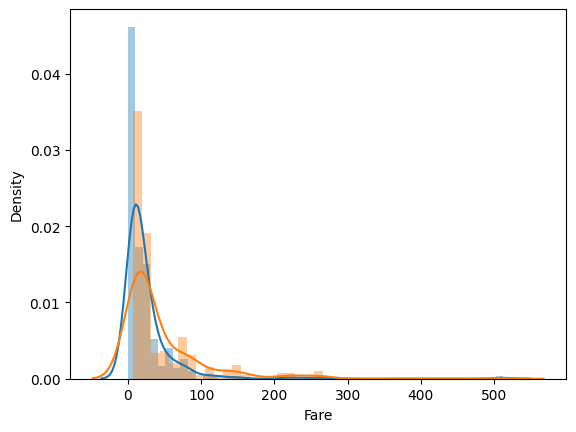

In [ ]:
import seaborn as sns

sns.distplot(df_male)
sns.distplot(df_female)

Because p_value is lower than significance level, we reject the null hypothesis, this means that prices, on average, paid by males and females is indeed diferent

### Paired Sample T-test

We aim to assess the effectiveness of a medical drug in controlling blood pressure.

 We have obtained readings of individuals' blood pressure both before and after taking the drug

In [ ]:
#Load data

df = pd.read_csv(r"https://raw.githubusercontent.com/data-bootcamp-v4/data/main/blood_pressure.csv")
df

,before,after
0,136.713072,92.432965
1,134.735618,105.022643
2,127.529115,82.242766
3,144.527126,93.607172
4,124.214720,103.212223
...,...,...
95,120.302824,85.128581
96,134.806478,106.925426
97,144.919839,83.105975
98,139.673854,87.560306


In [ ]:
#Set hypothesis

#H0: mu before = mu after
#H1: mu before != mu after

#Significance level -> 0.05
alpha = 0.05

In [ ]:
_, p_value = st.ttest_rel(df["before"], df["after"], alternative='two-sided')
p_value

np.float64(7.303035069607835e-48)

In [ ]:
if p_value > alpha:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We reject the null hypothesis


We reject the null hypothesis, therefore we can conclude the average blood pressure before and after taking the drug is not equal

### Independent Samples

In [ ]:
#For two groups where we cannot match the observations to one another. In this case transactions from a website with different interfaces (a, b)

ab_test = pd.read_csv('https://raw.githubusercontent.com/ironhack-edu/ds-ai-course/refs/heads/master/01-course/module-3/Week%204/Day%204%20-%20Chi2%20%26%20Anova/lesson/data/ab_test.csv?token=GHSAT0AAAAAAC375K34Q3Z4NXXU2CGFDZ5U2BFUJEA')
ab_test.head()

,a,b
0,0.27,13.61
1,6.08,21.53
2,13.74,9.23
3,9.70,5.36
4,7.00,12.90


In [ ]:
## What are we saying here?
# (that the new interface has or not an effect on the transactions)
# H₀: 𝛍₁=𝛍₂   vs   H₁: 𝛍₁≠𝛍₂
# H₀: 𝛍₁≥𝛍₂   vs   H₁: 𝛍₁<𝛍₂
# H₀: 𝛍₁≤𝛍₂    vs   H₁: 𝛍₁>𝛍₂

st.ttest_ind(ab_test['a'], ab_test['b'], alternative='less', equal_var=False) # if we don't assume equal variance the test will be more robust

TtestResult(statistic=np.float64(-2.637533181209767), pvalue=np.float64(0.004888121512414413), df=np.float64(93.79317907867807))

<Axes: >

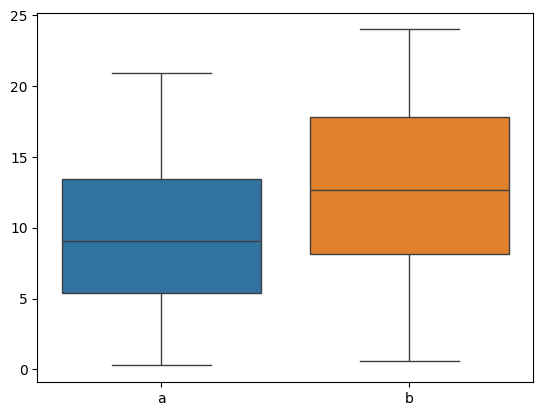

In [ ]:
sns.boxplot(data = ab_test)

### ANOVA

In [ ]:
#Load the data

df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/data_science_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large
1,2023,Mid,Contract,ML Engineer,30000,USD,30000,US,100,US,Small
2,2023,Mid,Contract,ML Engineer,25500,USD,25500,US,100,US,Small
3,2023,Senior,Full Time,Data Scientist,175000,USD,175000,CA,100,CA,Medium
4,2023,Senior,Full Time,Data Scientist,120000,USD,120000,CA,100,CA,Medium


Curious about salaries of data scientists, we're checking if company size will have an impact on people's salaries.

In order to procede with the test we must acknowledge that we have 3 differents groups

In [ ]:
df["company_size"].unique()

array(['Large', 'Small', 'Medium'], dtype=object)

In [ ]:
df_small = df[(df["company_size"]=="Small") & (df["job_title"]=="Data Scientist")]["salary_in_usd"]
df_medium = df[(df["company_size"]=="Medium") & (df["job_title"]=="Data Scientist")]["salary_in_usd"]
df_large = df[(df["company_size"]=="Large") & (df["job_title"]=="Data Scientist")]["salary_in_usd"]

In [ ]:
#Set the hypothesis

#H0: mu df_small = mu df_medium = mu df_large
#H1: mu df_small != mu df_medium != mu df_large

#Lets choose significance level of 10%
alpha = 0.10

st.f_oneway(df_small, df_medium, df_large)

F_onewayResult(statistic=np.float64(54.13023877571759), pvalue=np.float64(7.803716022966444e-23))

With such a small p_value, we once again, can reject the null hypothesis, therefore the company size will indeed have an impact of data scientists salary

### ANOVA test 2

In [ ]:

#to compare the means of multiple groups at the same time

interest_r = pd.read_csv('https://raw.githubusercontent.com/ironhack-edu/ds-ai-course/refs/heads/master/01-course/module-3/Week%204/Day%204%20-%20Chi2%20%26%20Anova/lesson/data/rate_by_city.csv?token=GHSAT0AAAAAAC375K35GG2X7DWXNNOY5V562BE6HBQ')
interest_r.head(50)

,Rate,City
0,13.75,1
1,13.75,1
2,13.50,1
3,13.50,1
4,13.00,1
5,13.00,1
6,13.00,1
7,12.75,1
8,12.50,1
9,14.25,2


In [ ]:
interest_r['city_count'] = interest_r.groupby('City').cumcount() ##is the new index

interest_r_pivot = interest_r.pivot(index='city_count', columns='City', values='Rate')
interest_r_pivot.columns = ['City_'+str(x) for x in interest_r_pivot.columns.values]
interest_r_pivot

,City_1,City_2,City_3,City_4,City_5,City_6
city_count,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00
5,13.00,12.40,13.25,12.97,13.25,12.00
6,13.00,12.30,13.00,12.50,13.00,12.00
7,12.75,11.90,12.50,12.25,12.50,11.90
8,12.50,11.90,12.50,11.89,12.45,11.90


In [ ]:
# H₀: 𝛍₁=𝛍₂=...=𝛍ₙ   vs   H₁: 𝛍ₛ≠𝛍ₜ for some s,t
st.f_oneway(interest_r_pivot['City_1'],
            interest_r_pivot['City_2'],
            interest_r_pivot['City_3'],
            interest_r_pivot['City_4'],
            interest_r_pivot['City_5'],
            interest_r_pivot['City_6'])

F_onewayResult(statistic=np.float64(4.8293848737024), pvalue=np.float64(0.001174551414504048))

With such a small p_value, we once again, can reject the null hypothesis, therefore the city will indeed have an impact on the rate.